# Lab 5 Wide and Deep Neural Networks
* Nicholas Larsen
* Steven Larsen

Dataset: https://www.kaggle.com/radmirzosimov/telecom-users-dataset?select=telecom_users.csv

## Feature Description:

## Loading the data

In [1]:
import pandas as pd
from copy import deepcopy
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
import tensorflow as tf
from sklearn import metrics as mt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn import metrics as mt
from tensorflow import keras
import missingno as mn

In [2]:

df_original = pd.read_csv('../hr_train.csv')
df_original.columns
#THERE IS NO CHANGING ORIGINAL
df_original

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [3]:
df_original['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

Impute the ranges into the average of the feature

In [4]:
#replace comapny size
df_original.replace(to_replace=['10/49'], value=['10-49'], inplace=True) #fix the records with 10/49 instead of 10-49
ranges = ['<10', '10-49', '50-99', '100-500',  '500-999', '1000-4999', '5000-9999', '10000+']
values = [10,   29.5,     74.5,    300,        749.5,     2999.5,      7499.5,      10000]
df_original.replace(to_replace=ranges, value=values, inplace=True)
df_original

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,300.0,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,10.0,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,74.5,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,10.0,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,74.5,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,74.5,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,29.5,Pvt Ltd,3,41,0


In [5]:
# replace experince
df_original.replace(to_replace=['>20', '<1'], value=[20, 0], inplace=True)

In [6]:
df_original.replace(to_replace=['>4', 'never'], value=[5, 0], inplace=True)

Eliminate all Nan Records

<AxesSubplot:>

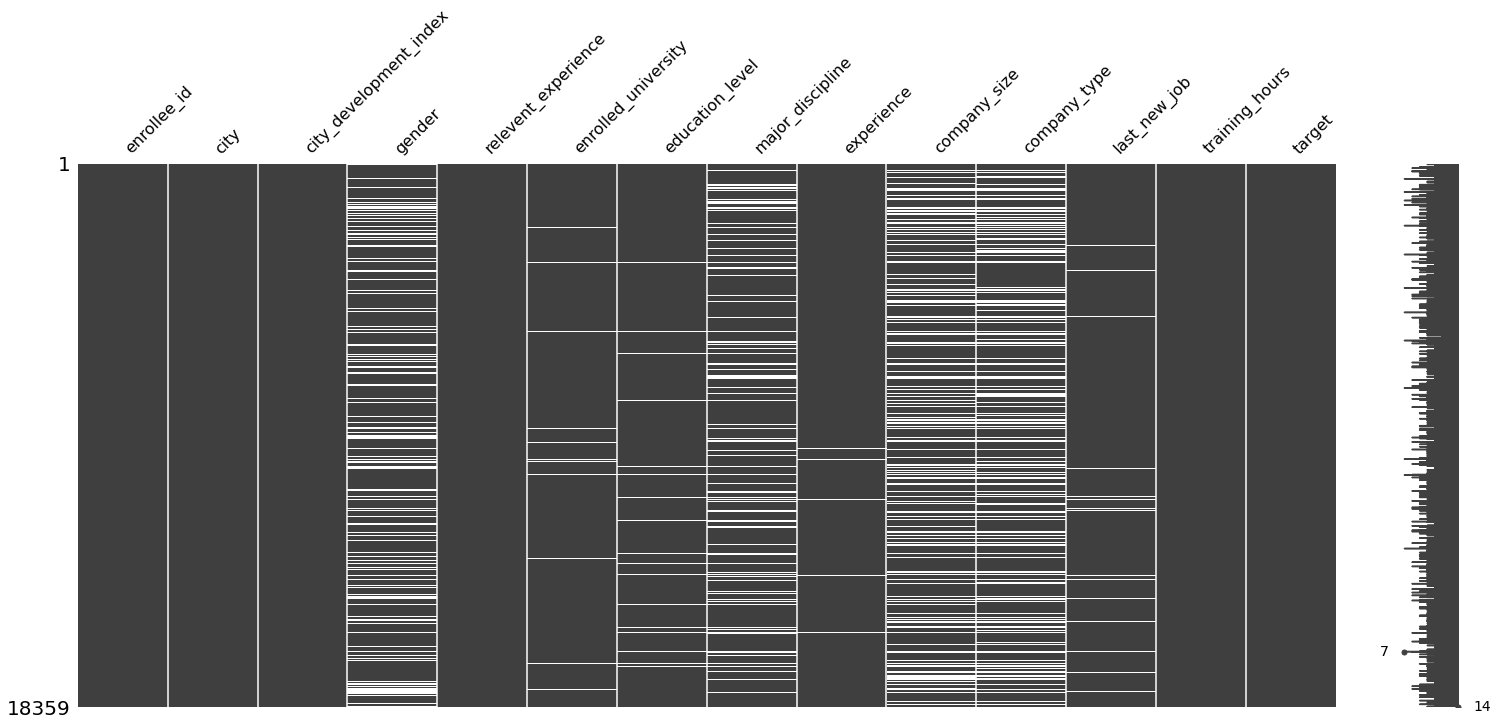

In [7]:
mn.matrix(df_original)

In [8]:
df_original['gender'].unique()
df_original['gender'] = df_original['gender'].replace(np.nan, 'Unspecified')

<AxesSubplot:>

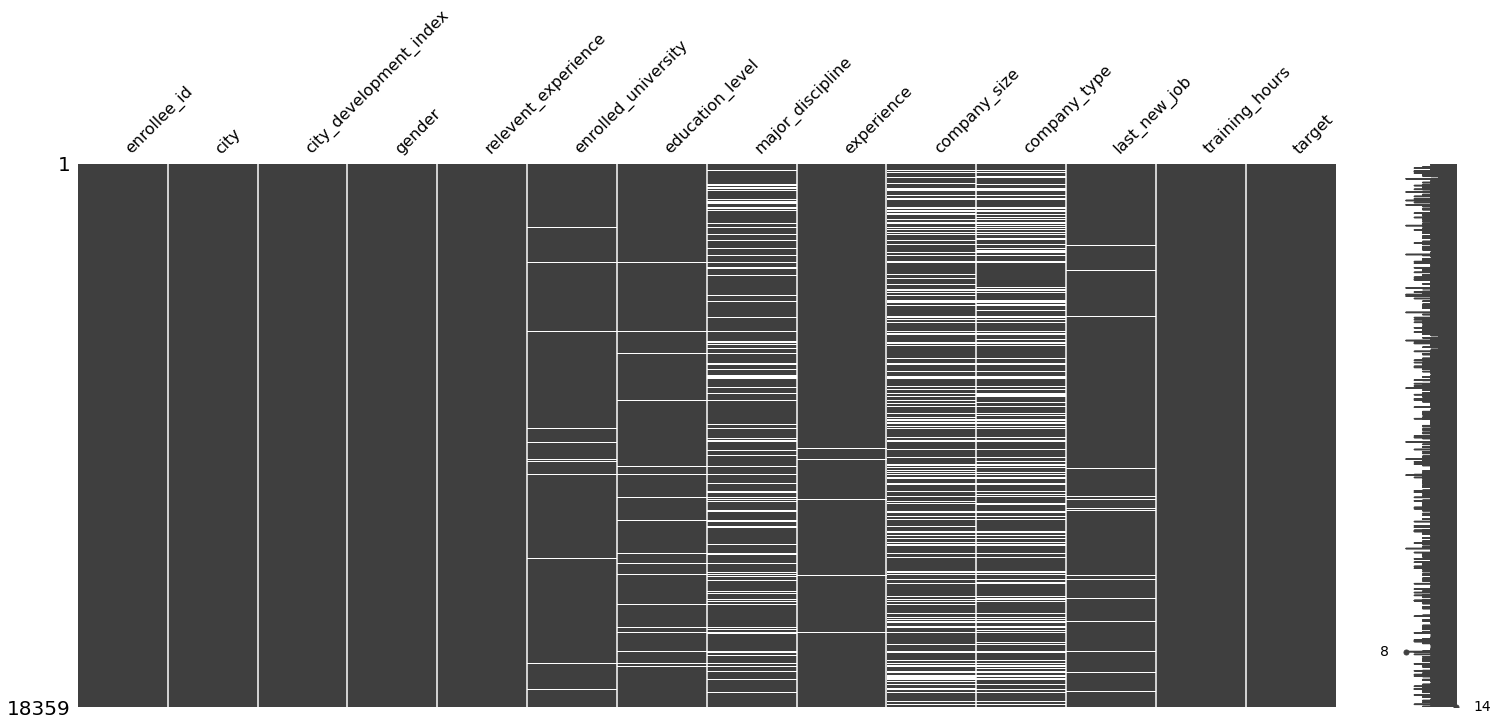

In [9]:
mn.matrix(df_original)

In [10]:
df_original['company_size'] = df_original['company_size'].replace(np.nan, 'Unspecified')
m = np.mean(df_original[df_original['company_size'] != 'Unspecified']['company_size'])
df_original['company_size'] = df_original['company_size'].replace('Unspecified', m)

In [11]:
df_original['company_type'] = df_original['company_type'].replace(np.nan, 'Unspecified')

<AxesSubplot:>

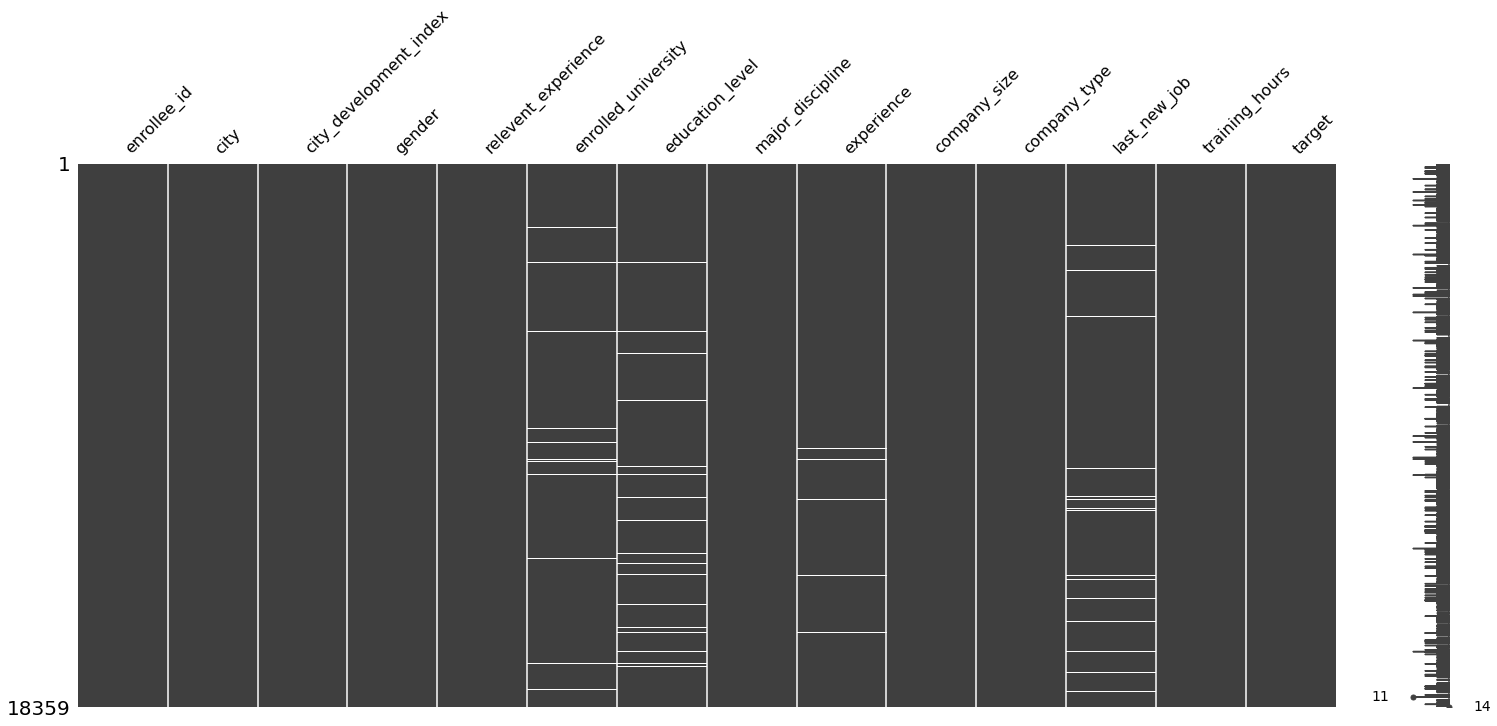

In [12]:
df_original['major_discipline'] = df_original['major_discipline'].replace(np.nan, 'Unspecified')
mn.matrix(df_original)

enrolled: 342
edu_level: 457
experience: 59
last_new_job: 367


<AxesSubplot:>

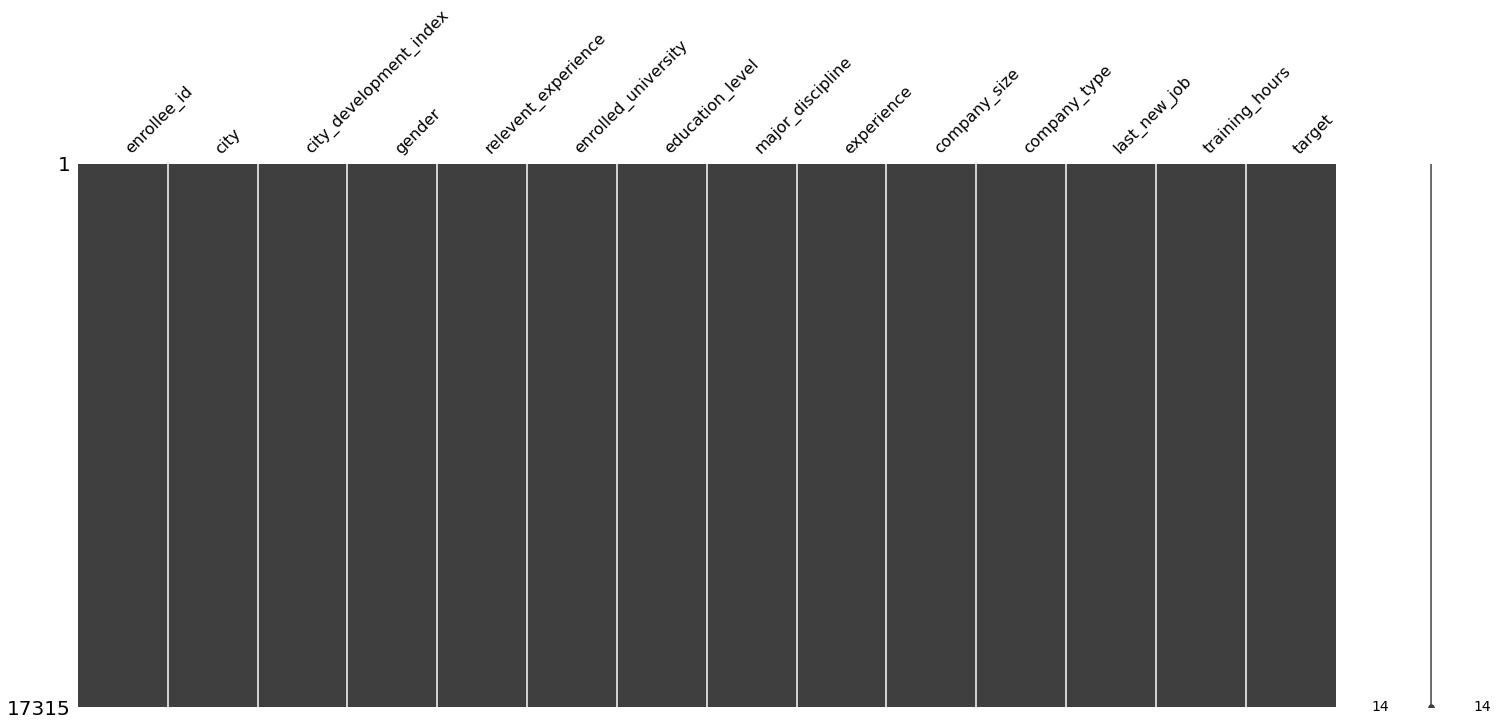

In [13]:
# What Nans are left?
print('enrolled:', df_original['enrolled_university'].isnull().sum())
print('edu_level:', df_original['education_level'].isnull().sum())
print('experience:', df_original['experience'].isnull().sum())
print('last_new_job:', df_original['last_new_job'].isnull().sum())

# Lets just drop these samples
df_original.dropna(inplace=True)
mn.matrix(df_original)

In [14]:
# There is a problem that some cities only appear once. Then they won't be in both train and test.
# To fix this we will just duplicate all of those sampels

only_one = []
for c in df_original['city'].unique():
    if len(df_original[df_original.city == c]) == 1:
        only_one.append(c)

print('dropped columns ', only_one)
for droper in only_one:
    df_original = df_original[df_original.city != droper]

dropped columns  ['city_171', 'city_140']


In [15]:
#THERE IS NO CHANGING ORIGINAL, Only run this cell once
y_df_orginal = df_original['target']
drop_from_x = ['target','enrollee_id']
df_original.drop(drop_from_x,axis=1, inplace=True)

In [16]:
X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(df_original, y_df_orginal, test_size=0.2, stratify=df_original['gender'])

In [17]:
#THERE IS NO CHANGING ORIGINAL
X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(df_original, y_df_orginal, test_size=0.2, stratify=df_original['city'])

X_train_df = deepcopy(X_train_df)
X_train_df.reset_index()

X_test_df = deepcopy(X_test_df)
X_test_df.reset_index()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,781,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,29.500000,Funded Startup,2,146
1,14278,city_10,0.895,Other,No relevent experience,Full time course,Masters,STEM,3,2271.225405,Unspecified,2,105
2,17003,city_16,0.910,Male,No relevent experience,Part time course,Graduate,STEM,3,2999.500000,Public Sector,5,84
3,2521,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,29.500000,Pvt Ltd,2,292
4,4017,city_23,0.899,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,16,29.500000,Pvt Ltd,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,11445,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,Humanities,12,74.500000,Public Sector,5,22
3459,2567,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,7499.500000,NGO,5,148
3460,14746,city_103,0.920,Unspecified,Has relevent experience,no_enrollment,Graduate,STEM,20,300.000000,Pvt Ltd,5,150
3461,13672,city_73,0.754,Male,No relevent experience,Full time course,Graduate,STEM,5,2271.225405,Unspecified,1,111


#### Turn all catagorical data into intergers

In [18]:
df_processed = deepcopy(df_original)
encoders = dict() 
categorical_headers = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                      'education_level', 'major_discipline', 'company_type',  ]


numeric_headers = ["city_development_index", "last_new_job", "training_hours"]


for col in categorical_headers:
    # integer encoded variables
    encoders[col] = LabelEncoder() # save the encoder
    X_train_df[col+'_int'] = encoders[col].fit_transform(X_train_df[col])
    X_test_df[col+'_int'] = encoders[col].transform(X_test_df[col])
    
for col in numeric_headers:
    X_train_df[col] = X_train_df[col].astype(np.float)
    X_test_df[col] = X_test_df[col].astype(np.float)
    
    ss = StandardScaler()
    X_train_df[col] = ss.fit_transform(X_train_df[col].values.reshape(-1, 1))
    X_test_df[col] = ss.transform(X_test_df[col].values.reshape(-1, 1))

### Identify Groups to Combine

* We think it will be easier for a cutomer to continue service if it is done automatically, therefore we would like to combine **Paperless billing, payment method, and contract.**
* We would also like to group the demographic data, **SeniorCitizen, Partner, Dependents, Gender**
* We want to group what services they opted into, **StreamingTv, StreamingMovies**
* Lastly we want to group **PhoneService, MultipleLines and InternetService**

TODO: Come back to the left over categories

### Create Cross Columns

In [19]:
cross_columns = [['city','relevent_experience','enrolled_university'],
                 ['education_level','major_discipline', 'company_type'],
                 ['gender', 'city', 'relevent_experience']]


cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train_df[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test_df[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train_df[cross_col_name] = enc.transform(X_crossed_train)
    X_test_df[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
    

In [20]:
categorical_headers

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type']

In [21]:
categorical_headers_ints = [x+'_int' for x in categorical_headers]

In [22]:
X_train_df[cross_col_df_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13850 entries, 899 to 10329
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   city_relevent_experience_enrolled_university   13850 non-null  int32
 1   education_level_major_discipline_company_type  13850 non-null  int32
 2   gender_city_relevent_experience                13850 non-null  int32
dtypes: int32(3)
memory usage: 270.5 KB


In [23]:
y_train_df.replace(to_replace=['Yes','No'], value=[0,1], inplace=True)

In [24]:
y_train_df

899      0
5424     0
15117    0
3750     0
16029    0
        ..
1067     0
2848     0
7212     0
14789    0
10329    0
Name: target, Length: 13850, dtype: int64

In [25]:
categorical_headers_ints

['city_int',
 'gender_int',
 'relevent_experience_int',
 'enrolled_university_int',
 'education_level_int',
 'major_discipline_int',
 'company_type_int']

In [38]:
# get crossed columns
X_train_crossed = X_train_df[cross_col_df_names].to_numpy()
X_test_crossed = X_test_df[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train_df[categorical_headers_ints].to_numpy() 
X_test_cat = X_test_df[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train_df[numeric_headers].to_numpy()
X_test_num = X_test_df[numeric_headers].to_numpy()

crossed_outputs = [] # this is where we will keep track of output of each branch

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train_df[col].max(),X_test_df[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train_df[col].max(),X_test_df[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=10, activation='sigmoid',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=10,activation='sigmoid', name='deep1')(deep_branch)
deep_branch = Dense(units=5,activation='sigmoid', name='deep2')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)


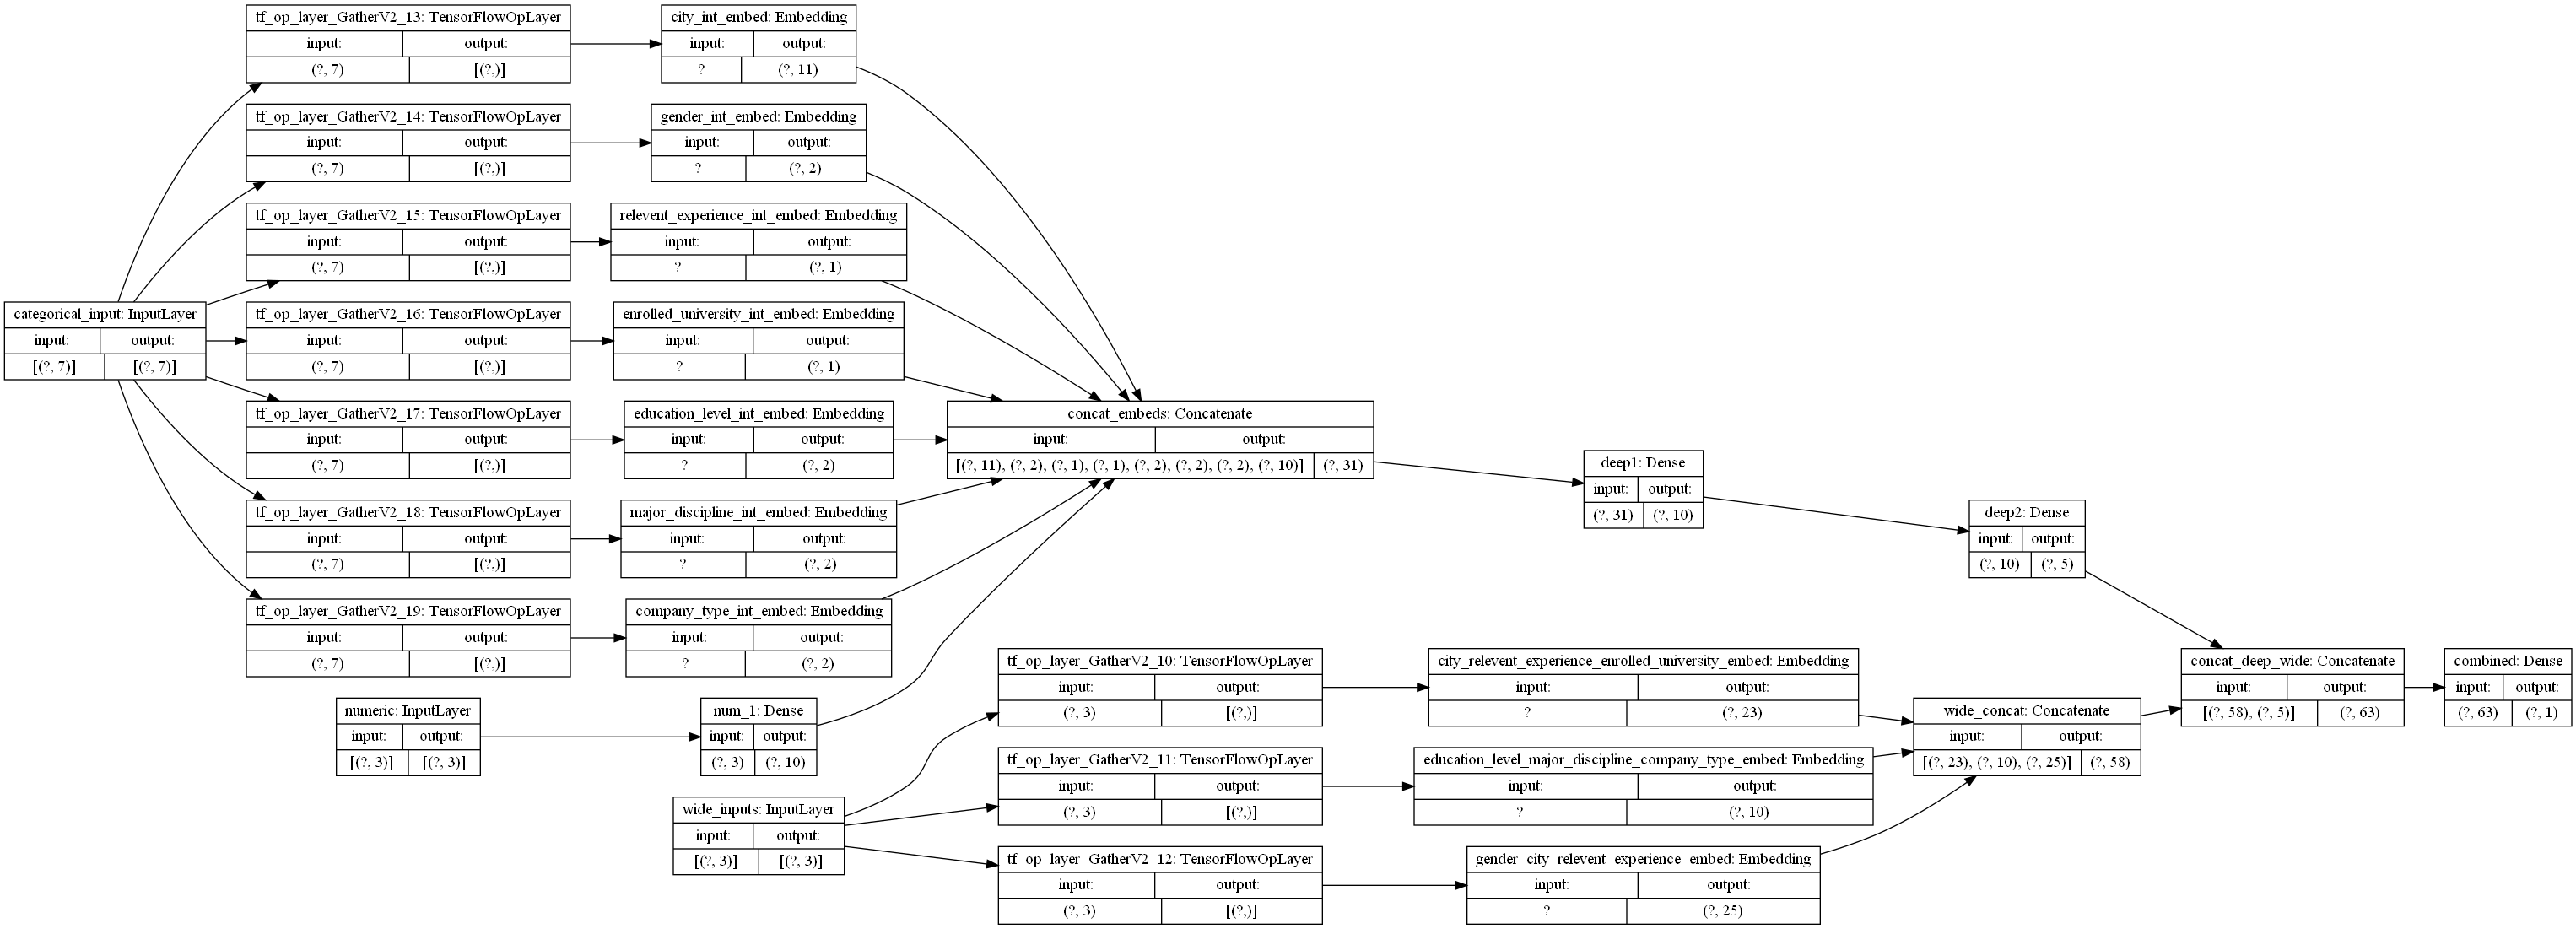

In [39]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [40]:
c_0 = y_train_df[y_train_df == 0].count()
c_1 = y_train_df[y_train_df == 1].count()

In [41]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy', tf.keras.metrics.Recall()])

w_0 = c_0 / (c_0+c_1)
w_1 = c_1 / (c_0+c_1) 
class_weights = {0: w_0, 1: w_1}

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train_df.to_numpy(), 
                    epochs=30, 
                    batch_size=64, 
                    verbose=1, class_weight=class_weights,
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],
                                       y_test_df.to_numpy()))

Epoch 1/30
217/217 [==============================] - 1s 3ms/step - loss: 0.1588 - accuracy: 0.8684 - recall_2: 0.0000e+00 - val_loss: 0.2093 - val_accuracy: 0.8764 - val_recall_2: 0.0000e+00
Epoch 2/30
217/217 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.8684 - recall_2: 0.0000e+00 - val_loss: 0.2009 - val_accuracy: 0.8764 - val_recall_2: 0.0000e+00
Epoch 3/30
217/217 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.8684 - recall_2: 0.0000e+00 - val_loss: 0.1944 - val_accuracy: 0.8764 - val_recall_2: 0.0000e+00
Epoch 4/30
217/217 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.8684 - recall_2: 0.0000e+00 - val_loss: 0.1890 - val_accuracy: 0.8764 - val_recall_2: 0.0000e+00
Epoch 5/30
217/217 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.8684 - recall_2: 0.0000e+00 - val_loss: 0.1843 - val_accuracy: 0.8764 - val_recall_2: 0.0000e+00
Epoch 6/30
217/217 [====================

In [42]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test_df.to_numpy(),yhat))
print(mt.classification_report(y_test_df.to_numpy(),yhat))

[[3035    0]
 [ 428    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3035
           1       0.00      0.00      0.00       428

    accuracy                           0.88      3463
   macro avg       0.44      0.50      0.47      3463
weighted avg       0.77      0.88      0.82      3463



C:\Users\nickl\.conda\envs\mlenv2020\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
